In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import math
import xgboost as xgb
import operator

In [2]:
os.chdir("F://Aegis//Python//Mini-Project")
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df1 = df.copy()
test1 = test.copy()

In [ ]:
df.describe()

In [3]:
## Identifying and converting the categorical variables into dummy variables,to avoid giving as int values to algorithm.
df.columns.to_series().groupby(df.dtypes).groups
df_obj = df.select_dtypes(include=[object])
df_num = df.drop(df_obj.columns, axis = 1)
df_obj = pd.get_dummies(df_obj)
df = pd.concat([df_obj,df_num], axis = 1)

test_obj = test.select_dtypes(include=[object])
test_num = test.drop(test_obj.columns, axis = 1)
test_obj = pd.get_dummies(test_obj)
test = pd.concat([test_obj,test_num], axis = 1)

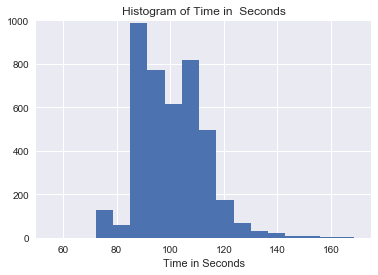

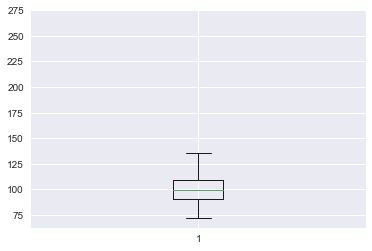

In [31]:
plt.hist(df.y, bins = 30)
plt.xlabel('Time in Seconds')
plt.title('Histogram of Time in  Seconds')
plt.grid(True)
plt.axis([50,175, 0,1000])
plt.show()

p = plt.boxplot(df.y)
plt.show()

In [ ]:
## Linear Assumptions.
#1. Linear and Additive Relationship between predictors and target variable.
#2. No correlation between the residuals(relevant in case of time series), and similarly, there should be no correlation
#   between the independent variables, ie, no multicollinearity.
#3. The residuals must have a constant variance against the predicted values, ie , homoscedascity should be there.
#4.The residuals must be normally distributed.

In [5]:
# To find out the columns having only 1 unique value throughout(cardinality =1), and dropping those
c = list()
for i in range(len(df.columns)):
    if(len(np.unique(df.iloc[:,i])) == 1):
        c.append(df.columns[i])
        
df.drop(c,axis = 1, inplace = True)
test.drop(c,axis = 1, inplace = True)

In [7]:
df_x = df.drop(['ID','y'], axis = 1)
df_y = df.y
final_id = test.ID
test = test.drop('ID', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=24)

In [17]:
## Linear Regression with the entire data
model = LinearRegression()
model.fit(df_x,df_y)
result = model.predict(df_x)

mse = mean_squared_error(df_y, result)
print("Mean Squared Error:")
print(mse)

print("Root Mean Squared Error:")
print(math.sqrt(mse))

print("R-squared :")
print(r2_score(df_y, result))

residual = df_y - result

Mean Squared Error:
61.2803724103
Root Mean Squared Error:
7.828178102873697
R-squared :
0.618733658494


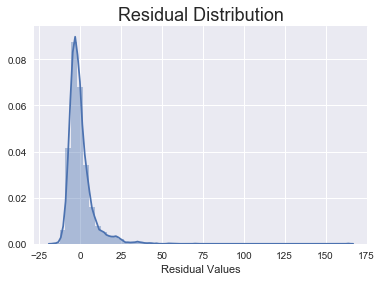

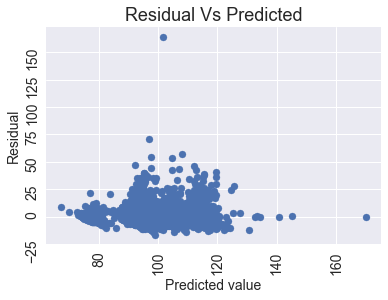

In [22]:
sns.set(color_codes=True)
sns.distplot(residual)
plt.xlabel("Residual Values")
plt.title("Residual Distribution", fontsize =18)
plt.show()

plt.scatter(result,residual)
plt.xlabel("Predicted value", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.title("Residual Vs Predicted", fontsize=18)
plt.xticks(fontsize= 14, rotation=90)
plt.yticks(fontsize= 14, rotation=90)
plt.show()

In [ ]:
## Linear Model Assumptions.
# From the residual distribution plot, the residuals are almost normal, excep for one value somewhere arounnd 165 value.
# so can consider that as an outlier.

## From the residual vs predicted plot we can see that the residuals are slightly more dense towards positive side of the 
# residual value

In [15]:
## Linear Regression with train-test split
model1 = LinearRegression()
model1.fit(X_train,y_train)
result1 = model1.predict(X_test)

mse1 = mean_squared_error(y_test,result1)
print("Mean Squared Error:")
print(mse1)

print("Root Mean Squared Error:")
print(math.sqrt(mse1))

residual1 = y_test - result1

Mean Squared Error:
3.12974044885e+25
Root Mean Squared Error:
5594408323358.506


In [28]:
## XGBoost with the entire data
xgb_params = {"objective": "reg:linear", "eta": 0.01, "max_depth": 6, "seed": 42, "silent": 1}
num_rounds = 1000
d_train = xgb.DMatrix(df_x, label=df_y)
d_test = xgb.DMatrix(test)
modelxg = xgb.train(xgb_params, d_train, num_rounds, feval =r2_score)
importance = modelxg.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

result_xg = modelxg.predict(d_train)

mse = mean_squared_error(df_y, result_xg)
print("Mean Squared Error:")
print(mse)

print("Root Mean Squared Error:")
print(math.sqrt(mse))

print("R-squared :")
print(r2_score(df_y, result_xg))

residual_xg = df_y - result_xg

Mean Squared Error:
46.665146902
Root Mean Squared Error:
6.831189274351716
R-squared :
0.709664789306


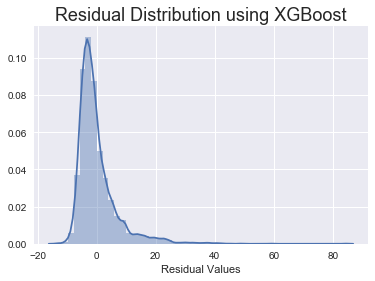

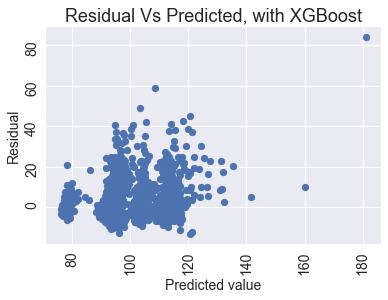

In [25]:
sns.set(color_codes=True)
sns.distplot(residual_xg)
plt.xlabel("Residual Values")
plt.title("Residual Distribution using XGBoost", fontsize =18)
plt.show()

plt.scatter(result_xg,residual_xg)
plt.xlabel("Predicted value", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.title("Residual Vs Predicted, with XGBoost", fontsize=18)
plt.xticks(fontsize= 14, rotation=90)
plt.yticks(fontsize= 14, rotation=90)
plt.show()

In [27]:
## XGBoost with train-test split

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test)
modelxg1 = xgb.train(xgb_params, d_train, num_rounds, feval =r2_score)
importance = modelxg1.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

result_xg1 = modelxg1.predict(d_test)

mse = mean_squared_error(y_test, result_xg1)
print("Mean Squared Error:")
print(mse)

print("Root Mean Squared Error:")
print(math.sqrt(mse))

print("R-squared :")
print(r2_score(y_test, result_xg1))

Mean Squared Error:
87.7152127934
Root Mean Squared Error:
9.365640009811335
R-squared :
0.505028373303


In [ ]:
###  END  ###